In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib
import matplotlib.dates as mdates


## Basic Customization

In [17]:
def bytespdate2num(fmt,encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [36]:
def graph_data(stock):
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    
    source_code = urllib.urlopen(stock_price_url).read().decode()
    
    stock_date = []
    split_source = source_code.split('\n')
    
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_date.append(line)
                
    date,closep,highp,lowp,openp,vol = np.loadtxt(stock_date,
                                                  delimiter = ',',
                                                  unpack = True,
                                                  converters = {0: bytespdate2num('%Y%m%d')})    
    """
                                                  %Y : full year 2015
                                                  %y : part year 15
                                                  %m : number month
                                                  %d : number day
                                                  %H : hours
                                                  %M : minutes
                                                  %S : seconds
                                                  EX.
                                                  ---- 12-06-2014
                                                  ---- %m-%d-%Y
    """
    fig = plt.figure(figsize = (15,5))
    ax1 = plt.subplot2grid((1,1),(0,0))
    ax1.grid(True,color = 'g', linestyle='-',linewidth = 2)
    
    ax1.plot_date(date,closep,'-',label = 'price')
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    
    plt.xlabel('date',fontsize =15)
    plt.ylabel('price',fontsize =15)
    plt.title('Interesting Graph')
    plt.tick_params(axis = 'both', labelsize = 12)
    plt.legend(loc = 'upper left')
    
    plt.subplots_adjust(left = 0.09,bottom = 0.20,right=0.94,top=0.95,wspace=0.2,hspace=0)
    
    plt.show()
    

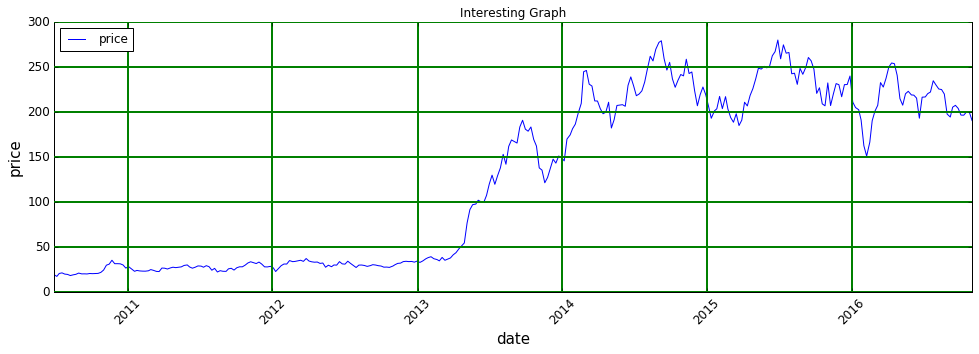

In [37]:
graph_data('TSLA')